In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

train_x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float).reshape(-1,2)
train_y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

W1_init = torch.tensor([[10.0, -10.0], [10.0, -10.0]], requires_grad=True)
b1_init =  torch.tensor([[-5.0, 15.0]], requires_grad=True)
W2_init =  torch.tensor([[10.0], [10.0]], requires_grad=True)
b2_init =  torch.tensor([[-15.0]], requires_grad=True)

In [13]:
class XOROperatorModel:
    def __init__(self, W1=W1_init, W2=W2_init, b1=b1_init, b2=b2_init):
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2

    # Predictor
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    def f2(self,x):
        return torch.sigmoid(x @ self.W2 + self.b2)

    def f(self, x):
        return self.f2(self.f1(x))  
    

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x),y)

In [14]:
model = XOROperatorModel()

model2 = XOROperatorModel(
    torch.rand((2,2), requires_grad=True),
    torch.rand((2,1), requires_grad=True),
    torch.rand((1,2), requires_grad=True),
    torch.rand((1,1), requires_grad=True)
)

optimizer = torch.optim.SGD([model.b1, model.W1, model.W2, model.b2], lr=0.01)
optimizer2 = torch.optim.SGD([model2.b1, model2.W1, model2.W2, model2.b2], lr=0.01)
for epoch in range(300000):
    model.loss(train_x, train_y).backward()  
    optimizer.step() 
    optimizer.zero_grad()  
    model2.loss(train_x, train_y).backward()  
    optimizer2.step() 
    optimizer2.zero_grad()  

print("Model 1 W1 = %s, b1 = %s, W2 = %s, b2 = %s, loss = %s" %(model.b1, model.W1, model.W2, model.b2, model.loss(train_x, train_y)))
print("Model 2W1 = %s, b1 = %s, W2 = %s, b2 = %s, loss = %s" %(model2.b1, model2.W1, model2.W2, model2.b2, model2.loss(train_x, train_y)))

Model 1 W1 = tensor([[-5., 15.]], requires_grad=True), b1 = tensor([[ 10., -10.],
        [ 10., -10.]], requires_grad=True), W2 = tensor([[10.7704],
        [10.7704]], requires_grad=True), b2 = tensor([[-16.2706]], requires_grad=True), loss = tensor(0.5051, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Model 2W1 = tensor([[0.7182, 0.7350]], requires_grad=True), b1 = tensor([[-1.0809, -1.9240],
        [ 0.6890,  2.0643]], requires_grad=True), W2 = tensor([[-1.2098],
        [-2.2083]], requires_grad=True), b2 = tensor([[-0.1542]], requires_grad=True), loss = tensor(0.6809, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


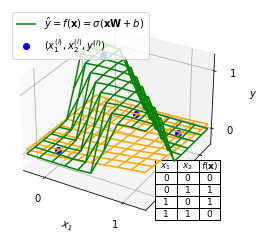

In [15]:
xt =train_x.t()[0]
yt =train_x.t()[1]

fig = plt.figure("Logistic regression: the logical OR operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$\\hat y=f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(xt.squeeze(), yt.squeeze(), train_y[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  loc="lower right")


plot1_f.remove()

plotModel(model, plot1, "green")
plotModel(model2, plot1, "orange")

fig.canvas.draw()

plt.show()